<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Importing the 2 sets. one for the model, and the second for final testing. 

import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
last_campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')

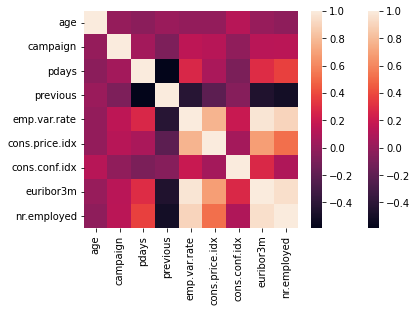

In [60]:
# See Pearsons correlations between columns in a heatmap. Drop target
# Saving first heatmap
import seaborn as sns
corr = campaign.drop(columns='y').corr()

heatmap1 = sns.heatmap(corr).get_figure()
sns.heatmap(corr)

In [61]:
# change target y to a numeric code using a dictionary and map
target_numeric = {'yes' : 1,
                  'no': 0}
campaign.y = campaign.y.map(target_numeric)
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
# variables names with points are not friendly change them with rename
campaign.rename(columns =  {'emp.var.rate' : 'emp_var_rate',
                   'cons.price.idx': 'cons_price_idx',
                   'cons.conf.idx' : 'cons_conf_idx',
                   'nr.employed': 'nr_employed'},
                   inplace = True)
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [63]:
#start the modeling here first approach with data as it is. 
# get dummies of the categorical values 
clean_data = pd.get_dummies(campaign, columns = ['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'], drop_first = True)

clean_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

In [64]:

### SELECTION OF ALL DATA FEATURES FOR FIRST RUN
# Decide which features to use all data here


X = clean_data.drop(['y'], axis = 1)
y = clean_data['y']




In [7]:

# MANUAL SELECTION OF FEATURES
# Decide which features to use select data here
features = ['age','nr_employed','euribor3m', 'campaign', 'housing_yes', 'cons_conf_idx', 'loan_yes','pdays', 'education_university.degree', 'marital_married', 'marital_single',]

X = clean_data [features]
y = clean_data['y']




In [68]:
# STEP 1
# Run the first clasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30)

## Create Decision Tree classifer object with gini criteria. Train Decision Tree with fit Classifer. Not tunned yet.

clf = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=2).fit(X_train, y_train)


In [69]:
# STEP 2 EVALUATION OF THE MODEL

#Predict the response for test dataset with Decission tree
# This report include just columns selected for correlation grade.

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))# See importance of each variable in the model Desission tree
# Features importances in a model this block can be run with diferent models to compare


feat_imports = (pd.DataFrame({"feature names": X_train.columns,
                              "importances": clf.feature_importances_})
                .sort_values("importances", ascending=False))

feat_imports


              precision    recall  f1-score   support

           0       0.71      0.88      0.79     10941
           1       0.85      0.65      0.73     10988

    accuracy                           0.77     21929
   macro avg       0.78      0.77      0.76     21929
weighted avg       0.78      0.77      0.76     21929



,feature names,importances
8,nr_employed,0.554180
6,cons_conf_idx,0.114874
7,euribor3m,0.066664
0,age,0.048416
5,cons_price_idx,0.038020
1,campaign,0.030452
2,pdays,0.026882
44,month_oct,0.015508
30,default_unknown,0.011433
36,contact_telephone,0.007087


In [67]:
# STEP 3 

# Adressing the unbalance of the set
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html



ro = RandomOverSampler()

# Decide which features to use (all here)


X = clean_data.drop(['y'], axis = 1)
y = clean_data['y']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_new, y_new = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate 
y = pd.DataFrame(y_new)
X = X_new
####################################################################
# AT THIS POINT A NEW X AND y IS CREATED; RUN STEP 1 and 2 AGAIN
###################################################################

In [45]:
# STEP 4 REDUCE DINENSIONS (LESS FEATURES)
# feat_imports was created during the evaluation process in STEP 2
feat_imports.reset_index(drop=True, inplace= True)

In [47]:
# Select the first ranked features in the current model in a list of features

features = feat_imports.loc[:10,'feature names']
features

0                     nr_employed
1                   cons_conf_idx
2                       euribor3m
3                             age
4                        campaign
5                           pdays
6     education_university.degree
7                     housing_yes
8                        loan_yes
9                  marital_single
10                marital_married
Name: feature names, dtype: object

In [48]:
# Use just this features to retrain the model

# Decide which features to use 


X = clean_data[features]
y = clean_data['y']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_new, y_new = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate 
y = pd.DataFrame(y_new)
X = X_new


In [ ]:
#use the new set to train the model go over the previous code